<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
data_df = pd.read_excel("Data_Pathrise.xlsx")
data_df.head()

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [4]:
data_df.isna().sum()

id                               0
pathrise_status                  0
primary_track                    0
cohort_tag                       8
program_duration_days          616
placed                           0
employment_status              229
highest_level_of_education      58
length_of_job_search            74
biggest_challenge_in_search     24
professional_experience        222
work_authorization_status      284
number_of_interviews           218
number_of_applications           0
gender                         492
race                            18
dtype: int64

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [6]:
data_df.describe()

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [41]:
placed_df = data_df.loc[data_df["placed"] == 1]
print(f'{placed_df.shape[0]} fellows have been placed out of {data_df.shape[0]} \
for a ratio of {round(placed_df.shape[0] / data_df.shape[0],2)}')
placed_df.head()

956 fellows have been placed out of 2544 for a ratio of 0.38


,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
23,24,Placed,PSO,NOV19B,193.0,1,Unemployed,Master's Degree,6 months to a year,Hearing back on my applications,1-2 years,Citizen,5.0,4,Male,Non-Hispanic White or Euro-American
30,31,Placed,SWE,NOV19A,73.0,1,Student,Master's Degree,Less than one month,Figuring out which jobs to apply for,1-2 years,F1 Visa/CPT,0.0,1,Male,East Asian or Asian American
39,40,Placed,SWE,NOV19A,83.0,1,Employed Full-Time,Master's Degree,3-5 months,Getting past final round interviews,5+ years,F1 Visa/OPT,NaN,15,Male,Native American or Alaskan Native
54,55,Placed,SWE,AUG19A,76.0,1,Student,Master's Degree,Less than one month,Getting past final round interviews,3-4 years,F1 Visa/OPT,0.0,30,Female,East Asian or Asian American


In [43]:
print(data_df.gender.unique())
data_df.loc[data_df["gender"].isna()].head()

['Male' 'Female' nan 'Decline to Self Identify' 'Non-Binary']


,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
24,25,Closed Lost,Design,NOV19B,0.0,0,Contractor,NaN,1-2 months,Hearing back on my applications,3-4 years,Green Card,0.0,20,NaN,East Asian or Asian American
56,57,Withdrawn,SWE,OCT19A,26.0,0,Student,Master's Degree,1-2 months,Technical interviewing,3-4 years,F1 Visa/OPT,7.0,6,NaN,South Asian or Indian American
94,95,Withdrawn,SWE,OCT18B,171.0,0,Student,Bachelor's Degree,Less than one month,Hearing back on my applications,5+ years,F1 Visa/OPT,1.0,10,NaN,East Asian or Asian American
112,113,Withdrawn,SWE,SEP18B,296.0,0,NaN,Master's Degree,6 months to a year,Hearing back on my applications,NaN,NaN,3.0,15,NaN,South Asian or Indian American
119,120,Withdrawn,SWE,APR19B,72.0,0,Contractor,Master's Degree,3-5 months,Getting past final round interviews,1-2 years,F1 Visa/OPT,1.0,20,NaN,East Asian or Asian American


In [45]:
data_df.gender = data_df.gender.fillna("Decline to Self Identify")

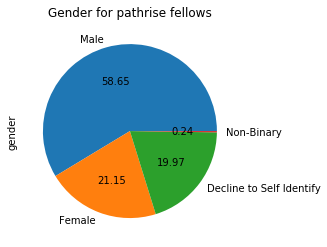

In [46]:
data_df.gender.value_counts().plot(kind='pie',autopct='%.2f')
plt.title("Gender for pathrise fellows")
plt.show()

In [ ]:
data_df.primary_tral